We need:

- PR curve
- Bar chart

Details:
1. 4 * 2 + 4 => Individual metric wise small dataset precision, recall, f1, acc er bar chart + avg
4. 4 - radar chart or any other comparison friendly chart
5. small vs big comparison using grouped bar plot
6. overall stacked bar chart
7. 2 leaderboards

In [30]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

small_results_folder = "/Users/codermehraj/Documents/codes/thesis/graphs/result/small"
large_results_folder = "/Users/codermehraj/Documents/codes/thesis/graphs/result/large"
avg_results_folder = "/Users/codermehraj/Documents/codes/thesis/graphs/result/avg"

In [26]:
def scatter_plot_by_matrics(results_folder, prefix):
    metrics_list = []

    # Read all files in the folder
    for filename in os.listdir(results_folder):
        if filename.endswith(".json"):
            filepath = os.path.join(results_folder, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                data['File'] = filename
                metrics_list.append(data)

    # Convert to DataFrame
    df = pd.DataFrame(metrics_list)

    print("Loaded Data:")
    print(df)

    # Plot metrics
    plt.figure(figsize=(12, 8))
    metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]

    # Create subplots with sorted data
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        
        # Sort data by current metric
        df_sorted = df.sort_values(by=metric)
        
        # Plot sorted values
        plt.plot(range(len(df_sorted)), df_sorted[metric], 
                marker='o', label=metric)
        
        # Set x-ticks to show filenames
        plt.xticks(range(len(df_sorted)), df_sorted['File'],
                  rotation=45, ha="right")
        
        plt.title(f"{prefix} {metric}")
        plt.xlabel("llm model")
        plt.ylabel(metric)
        plt.legend()

    plt.tight_layout()
    plt.show()

Loaded Data:
    Precision    Recall  F1 Score  Accuracy                             File
0    0.164179  0.400000  0.232804  0.838350       finetuned-lamma3.1-8b.json
1    0.345679  0.509091  0.411765  0.907834           claude-3.5-sonnet.json
2    0.079470  0.218182  0.116505  0.801743              llama3-8b-8192.json
3    0.238806  0.290909  0.262295  0.896074                 gpt-4o-mini.json
4    0.150000  0.436364  0.223256  0.814650          mixtral-8x7b-32768.json
5    0.219512  0.327273  0.262774  0.882831            claude-3-5-haiku.json
6    0.235294  0.290909  0.260163  0.895040                      gpt-4o.json
7    0.198473  0.472727  0.279570  0.849776  Qwen2.5-Coder-32B-Instruct.json
8    0.138462  0.176471  0.155172  0.883194                gemma2-9b-it.json
9    0.032432  0.109091  0.050000  0.749451             llama3-groq-70b.json
10   0.121622  0.490909  0.194946  0.759698                 gemma-7b-it.json
11   0.125926  0.309091  0.178947  0.827051        Qwen2.5-72B-

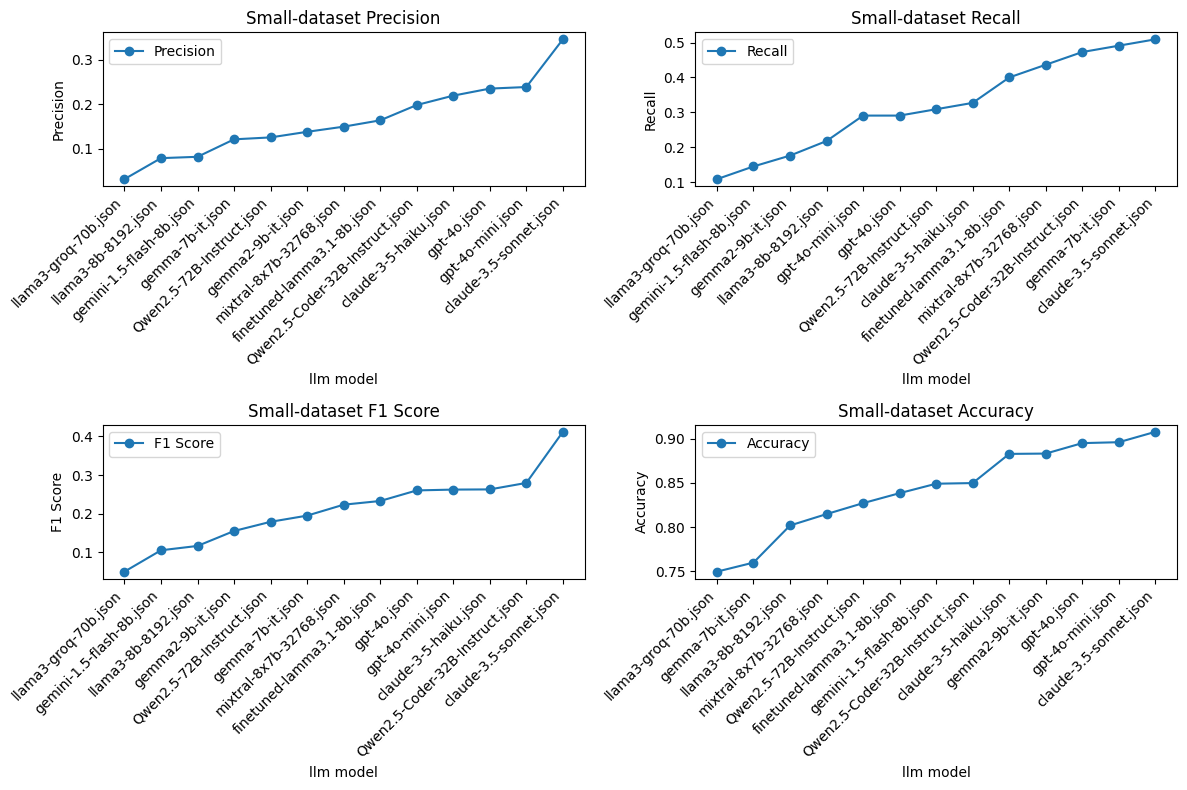

In [27]:
scatter_plot_by_matrics(small_results_folder, "Small-dataset")

Loaded Data:
   Precision    Recall  F1 Score  Accuracy                        File
0   0.257732  0.352113  0.297619  0.747053  finetuned-lamma3.1-8B.json
1   0.488000  0.221818  0.305000  0.685876      claude-3.5-sonnet.json
2   0.185567  0.523636  0.274025  0.351190            gpt-4o-mini.json
3   0.542056  0.210909  0.303665  0.688159       claude-3-5-haiku.json
4   0.475610  0.283636  0.355353  0.678774                 gpt-4o.json
5   0.252907  0.316364  0.281099  0.543590    gemini-1.5-flash-8b.json


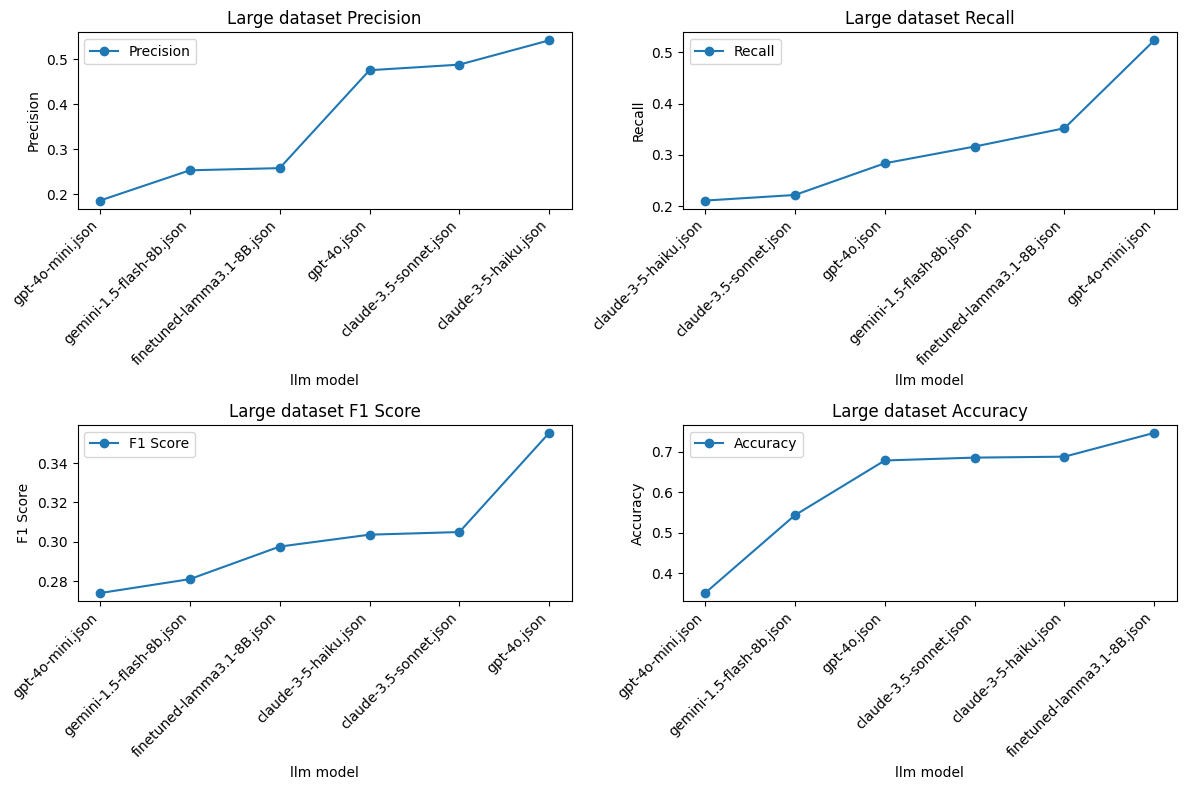

In [28]:
scatter_plot_by_matrics(large_results_folder, "Large dataset")

Loaded Data:
   Precision    Recall  F1 Score  Accuracy                        File
0   0.257732  0.210956  0.265212  0.792701  finetuned-lamma3.1-8B.json
1   0.416840  0.365455  0.358382  0.796855      claude-3.5-sonnet.json
2   0.212186  0.407273  0.268160  0.623632            gpt-4o-mini.json
3   0.380500  0.269086  0.283219  0.785495       claude-3-5-haiku.json
4   0.355452  0.287273  0.307758  0.786907                 gpt-4o.json
5   0.167691  0.230909  0.193181  0.696323    gemini-1.5-flash-8b.json


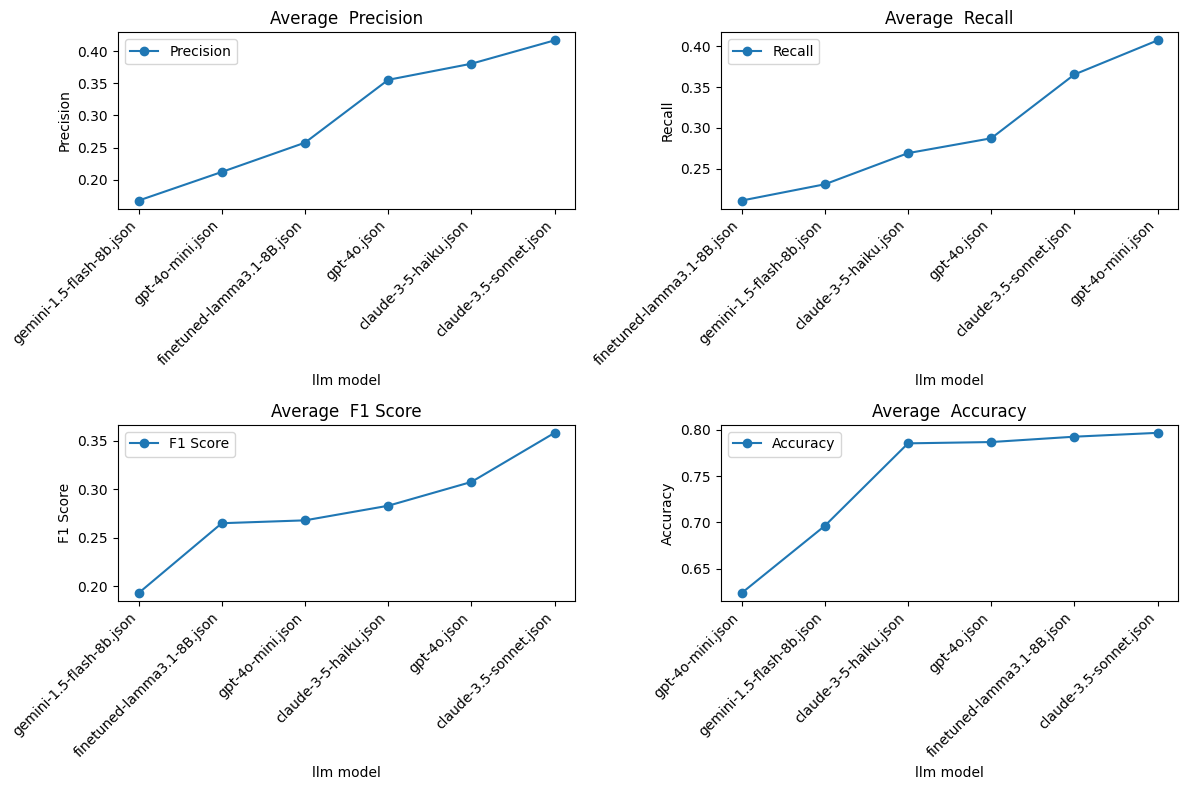

In [29]:
scatter_plot_by_matrics(avg_results_folder, "Average ")

In [59]:
def group_bar_plot_metrics(small_folder, large_folder):
    # Read data from both folders
    def read_folder(folder):
        metrics_list = []
        for filename in os.listdir(folder):
            if filename.endswith(".json"):
                filepath = os.path.join(folder, filename)
                with open(filepath, 'r') as file:
                    data = json.load(file)
                    data['File'] = filename.replace('.json', '')
                    metrics_list.append(data)
        return pd.DataFrame(metrics_list)

    # Read both folders
    df_small = read_folder(small_folder)
    df_large = read_folder(large_folder)
    
    # Find common models
    common_models = set(df_small['File']) & set(df_large['File'])
    
    # Filter for common models only
    df_small = df_small[df_small['File'].isin(common_models)]
    df_large = df_large[df_large['File'].isin(common_models)]

    # Plot metrics
    plt.figure(figsize=(15, 10))
    metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
    
    # Sort both dataframes by F1 Score
    df_small = df_small.sort_values(by='F1 Score')
    df_large = df_large.sort_values(by='F1 Score')
    
    print(df_large)
    print(df_small)
    
    # Set width and positions for bars
    bar_width = 0.35
    models = df_small['File'].unique()
    x = np.arange(len(models))
    
    # Create subplots
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        
        # Plot bars
        plt.bar(x - bar_width/2, df_small[metric], bar_width, label='Small Dataset')
        plt.bar(x + bar_width/2, df_large[metric], bar_width, label='Large Dataset')
        
        plt.title(f'Comparison of {metric}')
        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.xticks(x, models, rotation=45, ha='right')
        plt.legend()
        
    plt.tight_layout()
    plt.show()

   Precision    Recall  F1 Score  Accuracy                   File
2   0.185567  0.523636  0.274025  0.351190            gpt-4o-mini
5   0.252907  0.316364  0.281099  0.543590    gemini-1.5-flash-8b
0   0.257732  0.352113  0.297619  0.747053  finetuned-lamma3.1-8B
3   0.542056  0.210909  0.303665  0.688159       claude-3-5-haiku
1   0.488000  0.221818  0.305000  0.685876      claude-3.5-sonnet
4   0.475610  0.283636  0.355353  0.678774                 gpt-4o
    Precision    Recall  F1 Score  Accuracy                   File
12   0.082474  0.145455  0.105263  0.849057    gemini-1.5-flash-8b
0    0.164179  0.400000  0.232804  0.838350  finetuned-lamma3.1-8B
6    0.235294  0.290909  0.260163  0.895040                 gpt-4o
3    0.238806  0.290909  0.262295  0.896074            gpt-4o-mini
5    0.219512  0.327273  0.262774  0.882831       claude-3-5-haiku
1    0.345679  0.509091  0.411765  0.907834      claude-3.5-sonnet


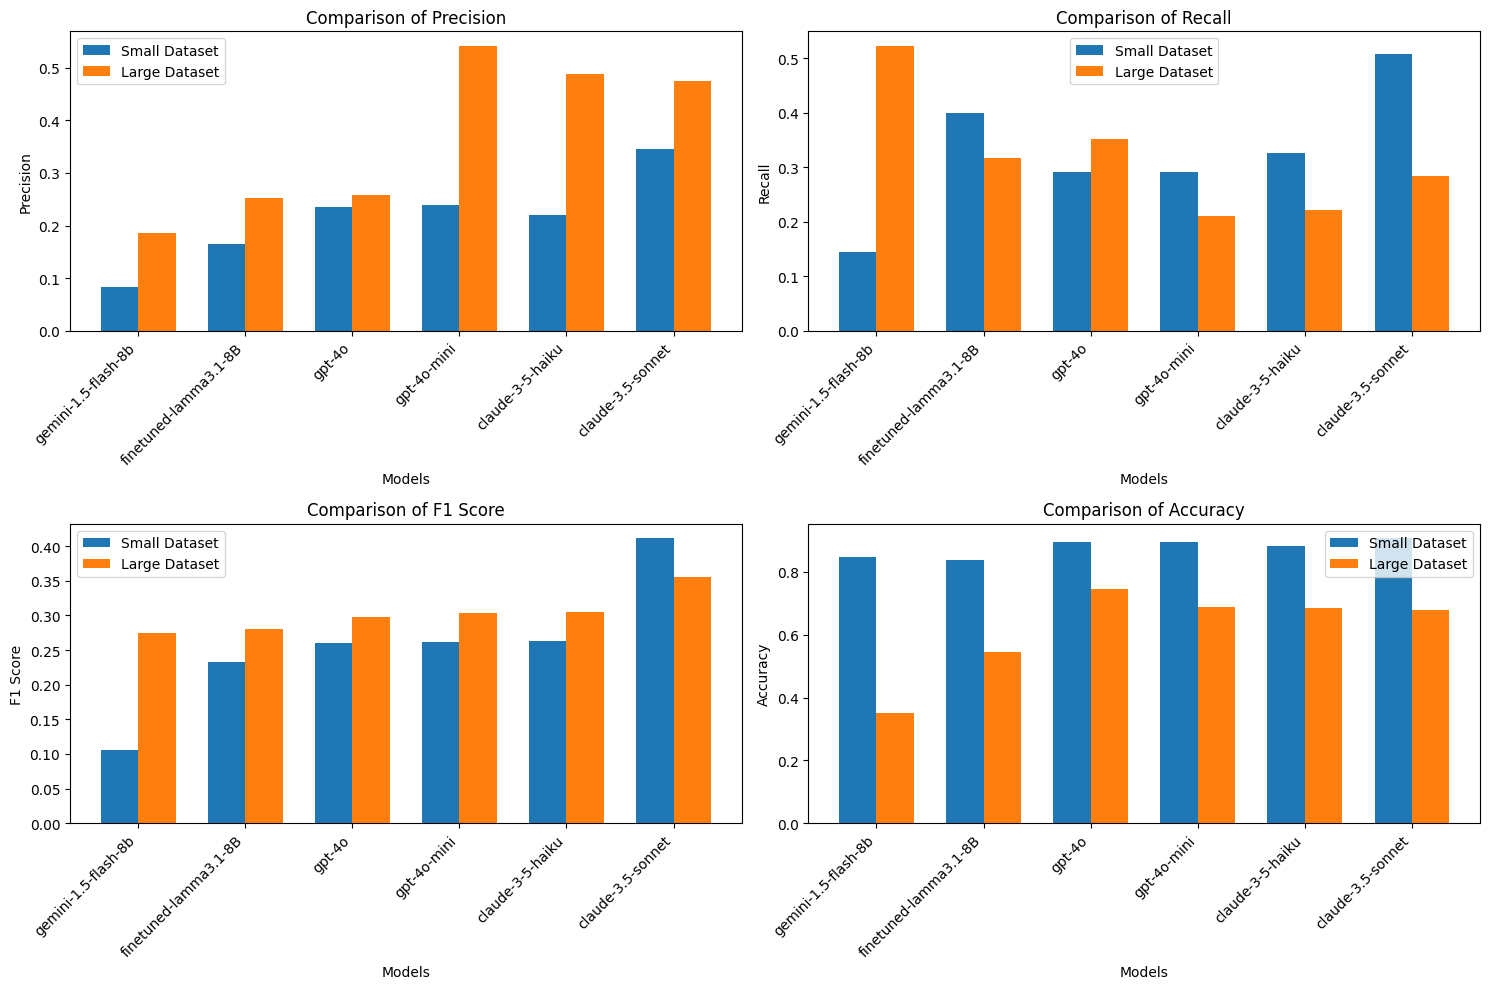

In [68]:
group_bar_plot_metrics(small_results_folder, large_results_folder)

In [39]:
def plot_leaderboard(results_folder, prefix):
    # Read data
    metrics_list = []
    for filename in os.listdir(results_folder):
        if filename.endswith(".json"):
            filepath = os.path.join(results_folder, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                data['Model'] = filename.replace('.json', '')
                metrics_list.append(data)

    # Convert to DataFrame and sort by F1 Score
    df = pd.DataFrame(metrics_list)
    df = df.sort_values(by='F1 Score', ascending=False)  # Ascending for bottom-to-top plot

    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, max(8, len(df)*0.5)))  # Dynamic height based on number of models
    
    # Define metrics and colors
    metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
    colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
    
    # Plot bars for each metric
    bar_width = 0.2
    y_pos = np.arange(len(df))
    
    for i, (metric, color) in enumerate(zip(metrics, colors)):
        ax.barh(y_pos + i*bar_width, df[metric], 
                height=bar_width, label=metric, color=color, alpha=0.8)
        
        # Add value labels on the bars
        for j, v in enumerate(df[metric]):
            ax.text(v, y_pos[j] + i*bar_width, f'{v:.3f}', 
                   va='center', fontsize=8)

    # Customize the plot
    ax.set_yticks(y_pos + bar_width*1.5)
    ax.set_yticklabels(df['Model'])
    ax.invert_yaxis()  # Invert to show highest scores at top
    
    ax.set_xlabel('Score')
    ax.set_title(f'{prefix} Model Performance Leaderboard')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add gridlines
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

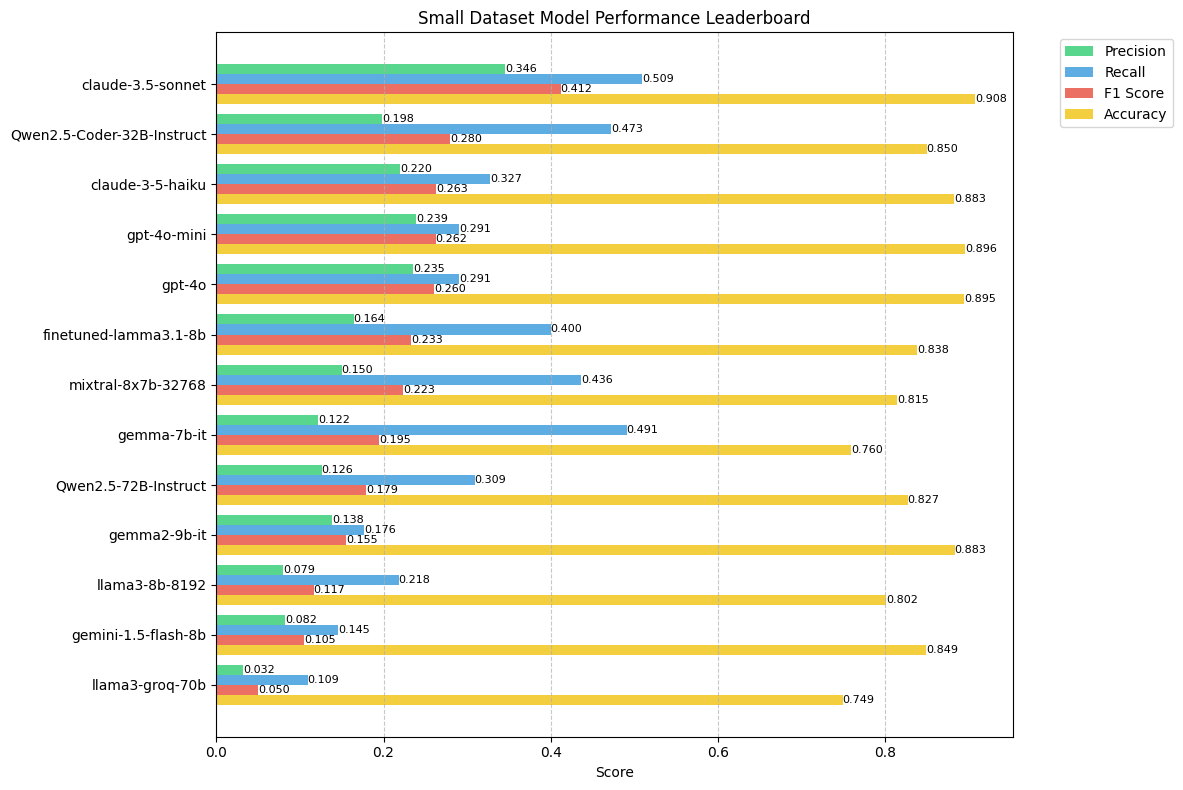

In [67]:
plot_leaderboard(small_results_folder, 'Small Dataset')

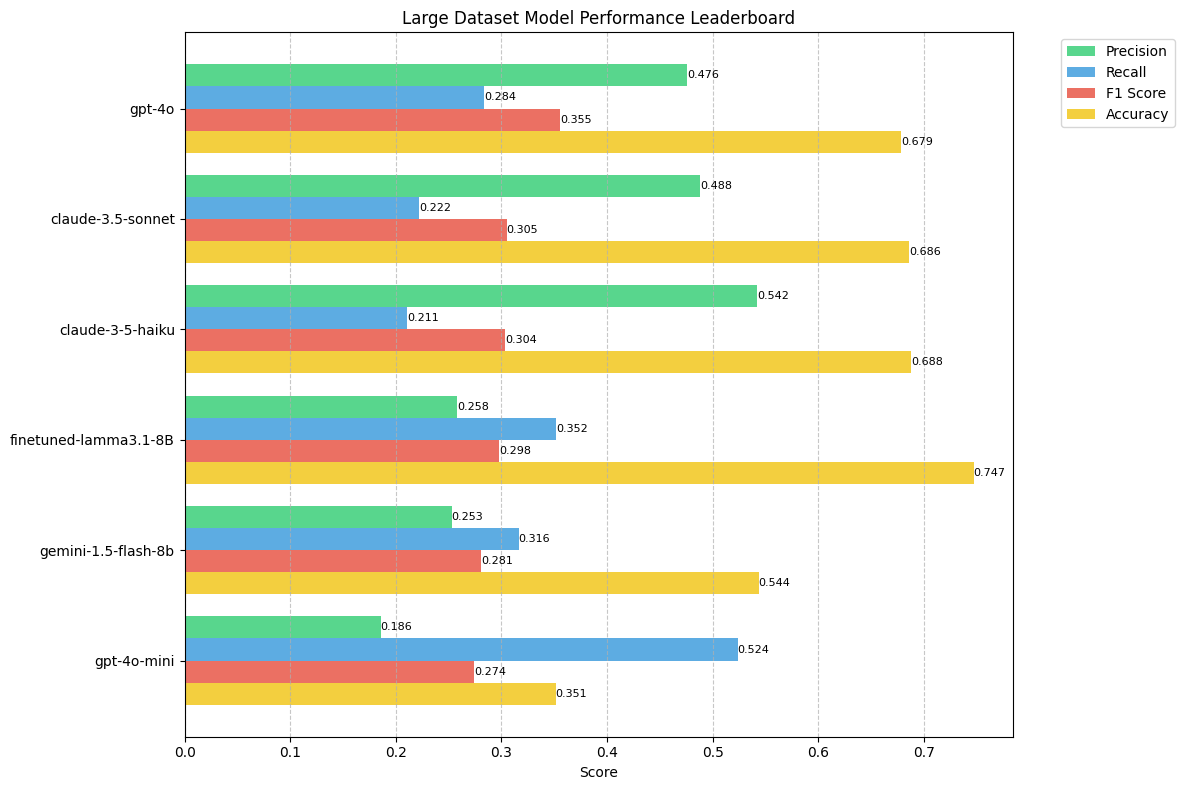

In [42]:
plot_leaderboard(large_results_folder, 'Large Dataset')

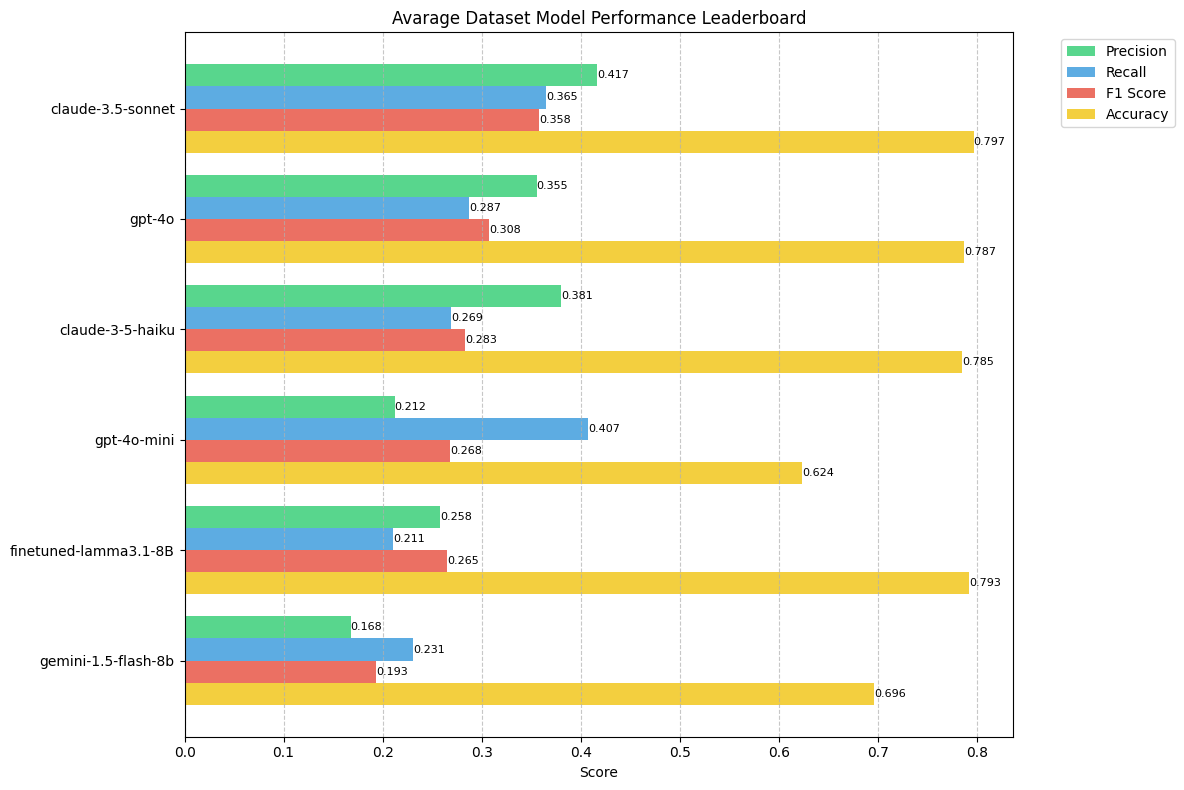

In [43]:
plot_leaderboard(avg_results_folder, 'Avarage Dataset')

In [65]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def plot_pr_curve(results_folder, prefix):
    metrics_list = []
    
    # Read results
    for filename in os.listdir(results_folder):
        if filename.endswith(".json"):
            filepath = os.path.join(results_folder, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                model_name = filename.replace('.json', '')
                
                # Calculate precision-recall points
                precision = data['Precision']
                recall = data['Recall']
                
                # Add to list
                metrics_list.append({
                    'model': model_name,
                    'pr': precision * recall,
                    'precision': precision,
                    'recall': recall
                })

    # Plot setup
    plt.figure(figsize=(10, 8))
    metrics_list = sorted(metrics_list, key=lambda x: x['pr'], reverse=True)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(metrics_list)))
    
    for data in metrics_list:
        print(f"Model: {data['model']}, PR: {data['pr']:.3f}")

    # Plot PR curves
    for data, color in zip(metrics_list, colors):
        # Plot points
        plt.scatter(data['recall'], data['precision'], 
                   label=f"{data['model']} (PR={data['precision']*data['recall']:.3f})",
                   color=color, s=100)
        
        # Add connecting lines
        plt.plot([0, data['recall'], 1], [1, data['precision'], 0], 
                color=color, linestyle='--', alpha=0.5)

    # Styling
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{prefix} Precision-Recall Curves')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set axis limits
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
    plt.tight_layout()
    plt.show()

Model: claude-3.5-sonnet, PR: 0.176
Model: Qwen2.5-Coder-32B-Instruct, PR: 0.094
Model: claude-3-5-haiku, PR: 0.072
Model: gpt-4o-mini, PR: 0.069
Model: gpt-4o, PR: 0.068
Model: finetuned-lamma3.1-8b, PR: 0.066
Model: mixtral-8x7b-32768, PR: 0.065
Model: gemma-7b-it, PR: 0.060
Model: Qwen2.5-72B-Instruct, PR: 0.039
Model: gemma2-9b-it, PR: 0.024
Model: llama3-8b-8192, PR: 0.017
Model: gemini-1.5-flash-8b, PR: 0.012
Model: llama3-groq-70b, PR: 0.004


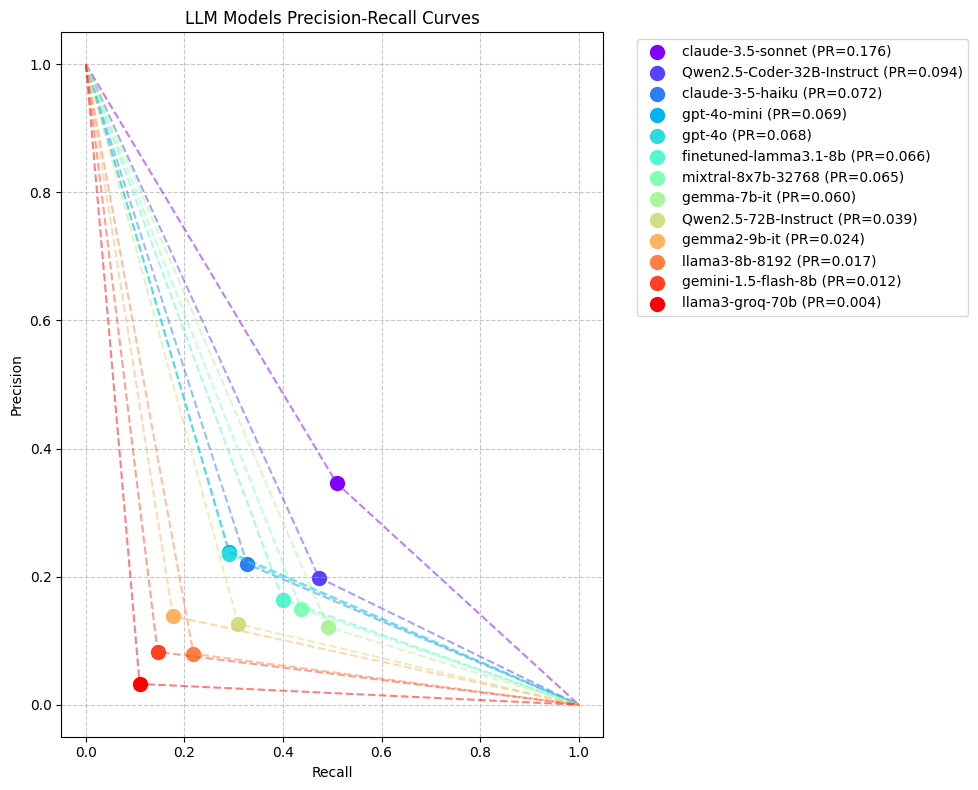

In [66]:
plot_pr_curve(small_results_folder, 'LLM Models')